## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  35.521552  1084.970550  0.190526  10.637617   209.848436
1  12.449994   649.335840  0.316111   8.006872   205.625913
2  26.985101  1605.261878  0.787106   9.415078  1263.698895
3  84.649991  1607.171161  0.137410   6.044621   236.660034
4  49.836791  1411.555885  0.758309   5.309798  1071.442240


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0045879	total: 60.7ms	remaining: 1m
1:	learn: 0.9921729	total: 61.1ms	remaining: 30.5s
2:	learn: 0.9802923	total: 61.6ms	remaining: 20.5s
3:	learn: 0.9676069	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9527112	total: 62.2ms	remaining: 12.4s
5:	learn: 0.9410628	total: 62.6ms	remaining: 10.4s
6:	learn: 0.9272787	total: 63ms	remaining: 8.94s
7:	learn: 0.9133345	total: 63.4ms	remaining: 7.86s
8:	learn: 0.8996450	total: 63.9ms	remaining: 7.04s
9:	learn: 0.8862605	total: 64.5ms	remaining: 6.39s
10:	learn: 0.8737003	total: 65ms	remaining: 5.84s
11:	learn: 0.8591824	total: 65.4ms	remaining: 5.38s
12:	learn: 0.8474204	total: 66ms	remaining: 5.01s
13:	learn: 0.8336310	total: 66.3ms	remaining: 4.67s
14:	learn: 0.8207630	total: 66.7ms	remaining: 4.38s
15:	learn: 0.8095901	total: 67.1ms	remaining: 4.13s
16:	learn: 0.7974402	total: 67.4ms	remaining: 3.9s
17:	learn: 0.7867313	total: 67.8ms	remaining: 3.7s
18:	learn: 0.7783379	total: 68.3ms	remaining: 3.53s
19:

64:	learn: 0.4225515	total: 88.3ms	remaining: 1.27s
65:	learn: 0.4169821	total: 88.9ms	remaining: 1.26s
66:	learn: 0.4122565	total: 89.3ms	remaining: 1.24s
67:	learn: 0.4079903	total: 89.6ms	remaining: 1.23s
68:	learn: 0.4021911	total: 90ms	remaining: 1.21s
69:	learn: 0.3971334	total: 90.6ms	remaining: 1.2s
70:	learn: 0.3921695	total: 91.1ms	remaining: 1.19s
71:	learn: 0.3880398	total: 91.5ms	remaining: 1.18s
72:	learn: 0.3831228	total: 91.9ms	remaining: 1.17s
73:	learn: 0.3785417	total: 92.3ms	remaining: 1.15s
74:	learn: 0.3733285	total: 92.6ms	remaining: 1.14s
75:	learn: 0.3684126	total: 93ms	remaining: 1.13s
76:	learn: 0.3639653	total: 93.3ms	remaining: 1.12s
77:	learn: 0.3589050	total: 93.9ms	remaining: 1.11s
78:	learn: 0.3545051	total: 94.4ms	remaining: 1.1s
79:	learn: 0.3496868	total: 94.7ms	remaining: 1.09s
80:	learn: 0.3457841	total: 95.2ms	remaining: 1.08s
81:	learn: 0.3411416	total: 95.6ms	remaining: 1.07s
82:	learn: 0.3372091	total: 96ms	remaining: 1.06s
83:	learn: 0.3329419

253:	learn: 0.0685933	total: 169ms	remaining: 496ms
254:	learn: 0.0681346	total: 170ms	remaining: 496ms
255:	learn: 0.0676169	total: 170ms	remaining: 495ms
256:	learn: 0.0671270	total: 171ms	remaining: 493ms
257:	learn: 0.0666495	total: 171ms	remaining: 492ms
258:	learn: 0.0661726	total: 172ms	remaining: 491ms
259:	learn: 0.0657128	total: 172ms	remaining: 490ms
260:	learn: 0.0652491	total: 173ms	remaining: 488ms
261:	learn: 0.0647534	total: 173ms	remaining: 487ms
262:	learn: 0.0643188	total: 173ms	remaining: 485ms
263:	learn: 0.0638697	total: 174ms	remaining: 484ms
264:	learn: 0.0635107	total: 174ms	remaining: 483ms
265:	learn: 0.0631268	total: 174ms	remaining: 481ms
266:	learn: 0.0626606	total: 175ms	remaining: 480ms
267:	learn: 0.0622458	total: 175ms	remaining: 478ms
268:	learn: 0.0617696	total: 175ms	remaining: 476ms
269:	learn: 0.0614182	total: 176ms	remaining: 475ms
270:	learn: 0.0610105	total: 176ms	remaining: 474ms
271:	learn: 0.0606123	total: 176ms	remaining: 472ms
272:	learn: 

485:	learn: 0.0218906	total: 270ms	remaining: 285ms
486:	learn: 0.0218043	total: 270ms	remaining: 285ms
487:	learn: 0.0217203	total: 271ms	remaining: 284ms
488:	learn: 0.0216722	total: 271ms	remaining: 283ms
489:	learn: 0.0215704	total: 271ms	remaining: 282ms
490:	learn: 0.0215299	total: 272ms	remaining: 282ms
491:	learn: 0.0214386	total: 272ms	remaining: 281ms
492:	learn: 0.0213137	total: 273ms	remaining: 281ms
493:	learn: 0.0212192	total: 273ms	remaining: 280ms
494:	learn: 0.0211315	total: 274ms	remaining: 279ms
495:	learn: 0.0210272	total: 274ms	remaining: 278ms
496:	learn: 0.0209815	total: 274ms	remaining: 278ms
497:	learn: 0.0209430	total: 275ms	remaining: 277ms
498:	learn: 0.0208413	total: 275ms	remaining: 276ms
499:	learn: 0.0207968	total: 276ms	remaining: 276ms
500:	learn: 0.0207028	total: 276ms	remaining: 275ms
501:	learn: 0.0206655	total: 277ms	remaining: 274ms
502:	learn: 0.0205720	total: 277ms	remaining: 274ms
503:	learn: 0.0205288	total: 277ms	remaining: 273ms
504:	learn: 

674:	learn: 0.0120646	total: 351ms	remaining: 169ms
675:	learn: 0.0120188	total: 352ms	remaining: 168ms
676:	learn: 0.0119733	total: 352ms	remaining: 168ms
677:	learn: 0.0119290	total: 352ms	remaining: 167ms
678:	learn: 0.0118836	total: 353ms	remaining: 167ms
679:	learn: 0.0118342	total: 353ms	remaining: 166ms
680:	learn: 0.0117858	total: 354ms	remaining: 166ms
681:	learn: 0.0117770	total: 354ms	remaining: 165ms
682:	learn: 0.0117303	total: 354ms	remaining: 164ms
683:	learn: 0.0116818	total: 355ms	remaining: 164ms
684:	learn: 0.0116340	total: 355ms	remaining: 163ms
685:	learn: 0.0115916	total: 356ms	remaining: 163ms
686:	learn: 0.0115595	total: 356ms	remaining: 162ms
687:	learn: 0.0115072	total: 357ms	remaining: 162ms
688:	learn: 0.0114600	total: 357ms	remaining: 161ms
689:	learn: 0.0114139	total: 357ms	remaining: 161ms
690:	learn: 0.0113833	total: 358ms	remaining: 160ms
691:	learn: 0.0113749	total: 358ms	remaining: 159ms
692:	learn: 0.0113666	total: 359ms	remaining: 159ms
693:	learn: 

907:	learn: 0.0059934	total: 451ms	remaining: 45.7ms
908:	learn: 0.0059666	total: 452ms	remaining: 45.2ms
909:	learn: 0.0059506	total: 452ms	remaining: 44.7ms
910:	learn: 0.0059349	total: 453ms	remaining: 44.2ms
911:	learn: 0.0059173	total: 453ms	remaining: 43.7ms
912:	learn: 0.0058911	total: 454ms	remaining: 43.2ms
913:	learn: 0.0058758	total: 454ms	remaining: 42.7ms
914:	learn: 0.0058588	total: 455ms	remaining: 42.2ms
915:	learn: 0.0058486	total: 455ms	remaining: 41.7ms
916:	learn: 0.0058320	total: 455ms	remaining: 41.2ms
917:	learn: 0.0058064	total: 456ms	remaining: 40.7ms
918:	learn: 0.0057918	total: 456ms	remaining: 40.2ms
919:	learn: 0.0057782	total: 457ms	remaining: 39.7ms
920:	learn: 0.0057621	total: 457ms	remaining: 39.2ms
921:	learn: 0.0057476	total: 457ms	remaining: 38.7ms
922:	learn: 0.0057225	total: 458ms	remaining: 38.2ms
923:	learn: 0.0057087	total: 458ms	remaining: 37.7ms
924:	learn: 0.0056947	total: 459ms	remaining: 37.2ms
925:	learn: 0.0056701	total: 459ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


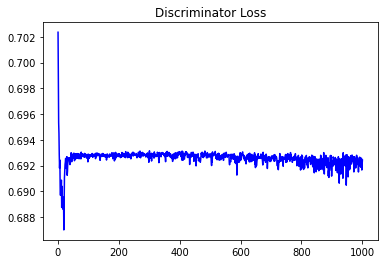

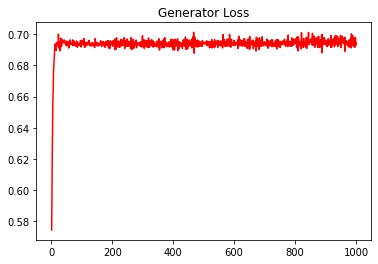

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0032938159787030906


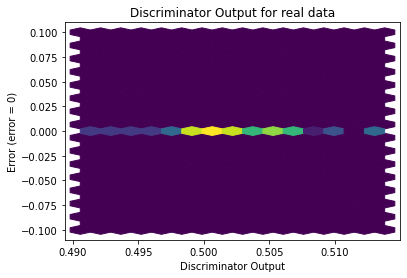

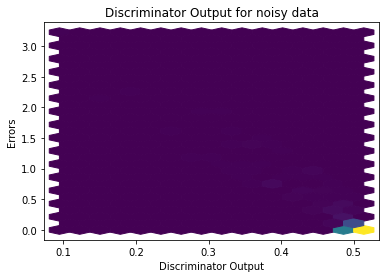

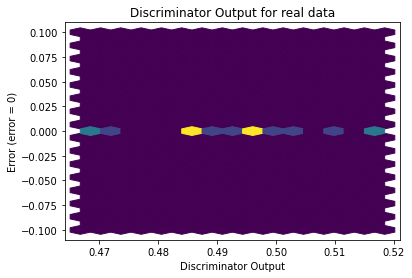

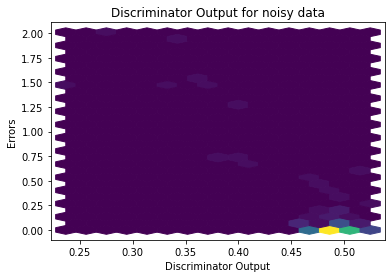

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2951]], requires_grad=True)
